<a href="https://colab.research.google.com/github/10100111/Display-of-HW1/blob/main/9_Ultra_Lite_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_(%D0%A3%D0%BD%D0%B8%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%82%D0%B5%D1%82_%D0%B8%D1%81%D0%BA%D1%83%D1%81%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B8%D0%BD%D1%82%D0%B5%D0%BB%D0%BB%D0%B5%D0%BA%D1%82%D0%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание Ultra Lite

Макс 10 баллов

Переписать ноутбук по распознаванию рукописных цифр своими руками, восстановив следующие операции:

1. Импорт библиотек.

2. Загрузка базы mnist.

3. Нормирование и преобразование x_train и y_train.

4. Создание сверточной нейронной сети.

5. Обучение сверточной нейронной сети.

Можно смотреть в ноутбук с занятия, но код писать самостоятельно.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import math
import os
from google.colab import drive

%matplotlib inline



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Распознавание изображений из набора данных MNIST 


In [ ]:
# mnist загрузка базы
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

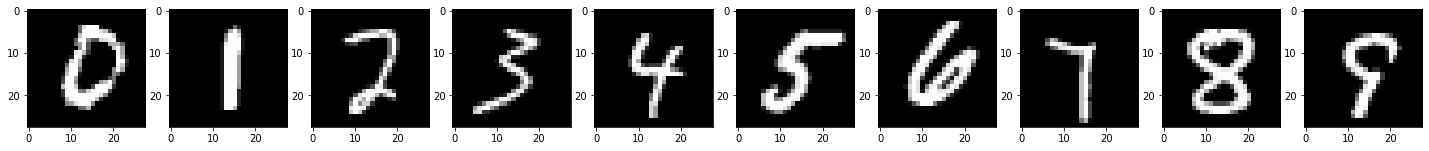

In [ ]:
# Выводим картинки для каждого класса (примеры)
fig,axs = plt.subplots(1, 10, figsize=(25, 3))    #создаем полотно из 10 графиков
for i in range(10):
  label_indexes = np.where(y_train==i)[0]         #получаем список из индексов положений класса i в y_train 
  index = random.choice(label_indexes)            # выбираем рандомно индекс
  img = x_train[index]                            # выбираем картинку из x_train
  axs[i].imshow(Image.fromarray(img), cmap='gray') #отображаем картинку i-тым

plt.show()                                        #показать картинку

In [ ]:
# преобразуем y_train, y_test в ohe
y_train = utils.to_categorical(y_train,10)
y_test = utils.to_categorical(y_test, 10)


In [ ]:
#меняем размерность, добавляем в конце 1, чтобы сверточная сеть понимала, что это черно-белые
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# проверим размерность и глянем на правильных ответах
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [ ]:
# Создаем модель и указываем batch_size отдельно (не поняла зачем?)
batch_size = 128

model = Sequential()

# слой пакетной нормализации
model.add(BatchNormalization(input_shape = ( 28, 28, 1)))

#первый сверточный слой
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))

#второй сверточный слой
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))

#первый слой подвыборки
model.add(MaxPooling2D(pool_size = (2, 2)))
#слой регуляризации Dropout
model.add(Dropout(0.25))

#разворачиваем данные в один единый вектор
model.add(Flatten())

#полносвязный слой для классификации
model.add(Dense(256, activation='relu'))
#слой регуляризации Dropout
model.add(Dropout(0.25))

#выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#компилирвем сеть
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 
# можете своими словами сказать в каких случаях ставить метрику mse, mae, accuracy? 
# из определения - это функция, которая используется для оценки работы вашей модели.
# хочу понять как применяется :) не сочтите за труд , буду рада информации))

model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [ ]:
# Обучение сети
history = model.fit(x_train, 
                    y_train,
                    batch_size = batch_size,
                    epochs = 15,
                    validation_data = (x_test, y_test),
                    verbose = 1)

Epoch 1/15
469/469 [==============================] - 36s 15ms/step - loss: 0.1689 - accuracy: 0.9476 - val_loss: 0.0507 - val_accuracy: 0.9835
Epoch 2/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0519 - accuracy: 0.9837 - val_loss: 0.0496 - val_accuracy: 0.9855
Epoch 3/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.0353 - val_accuracy: 0.9884
Epoch 4/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0267 - accuracy: 0.9912 - val_loss: 0.0282 - val_accuracy: 0.9912
Epoch 5/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0220 - accuracy: 0.9926 - val_loss: 0.0339 - val_accuracy: 0.9894
Epoch 6/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.0340 - val_accuracy: 0.9913
Epoch 7/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0288 - val_accuracy: 0.991